In [114]:
import pandas as pd
import numpy as np

In [115]:
names = ['Year','Month','ppt(mm)','tmax(degC)','tmin(degC)','aet(mm)','PDSI(unitless)','state','district','cluster14','cluster15','cluster18','cluster20','cluster25','cluster27','cluster30','cluster35']

In [116]:
df = pd.read_csv("C:/Users/H/Documents/agroclimatic_clusters.txt", sep=',', header=None, names=names, index_col=False, engine='python')

In [117]:
df.head()

,Year,Month,ppt(mm),tmax(degC),tmin(degC),aet(mm),PDSI(unitless),state,district,cluster14,cluster15,cluster18,cluster20,cluster25,cluster27,cluster30,cluster35
0,1958,1,0,32.1,16.6,2,-0.1,maharashtra,solapur,8,7,0,7,12,23,15,23
1,1958,2,0,34.2,18.4,2,-0.5,maharashtra,solapur,8,7,0,7,12,23,15,23
2,1958,3,17,38.5,21.5,17,0.2,maharashtra,solapur,8,7,0,7,12,23,15,23
3,1958,4,32,40.2,25.3,32,0.8,maharashtra,solapur,8,7,0,7,12,23,15,23
4,1958,5,68,40.5,25.8,65,1.5,maharashtra,solapur,8,7,0,7,12,23,15,23


In [118]:
df['state'].value_counts()

uttar pradesh             52080
madhya pradesh            35712
bihar                     27528
maharashtra               25296
rajasthan                 23808
orissa                    22320
tamil nadu                22320
karnataka                 20088
gujarat                   18600
andhra pradesh            17112
assam                     17112
jharkhand                 16368
west bengal               14136
haryana                   14136
punjab                    12648
chhattisgarh              11904
arunachal pradesh         11160
jammu and kashmir         10416
kerala                    10416
uttaranchal                9672
himachal pradesh           8928
manipur                    6696
mizoram                    5952
nagaland                   5952
meghalaya                  5208
puducherry                 2976
sikkim                     2976
tripura                    2976
andaman and nicobar        1488
goa                        1488
daman and diu              1488
chandiga

In [119]:
a = []
for i in range(len(df)):
    if df['state'][i]!='rajasthan':
        a.append(i)

In [120]:
df = df.drop(a)

In [121]:
df.head()

,Year,Month,ppt(mm),tmax(degC),tmin(degC),aet(mm),PDSI(unitless),state,district,cluster14,cluster15,cluster18,cluster20,cluster25,cluster27,cluster30,cluster35
11160,1958,1,7,23.6,9.1,15,0.8,rajasthan,bharatpur,1,7,11,11,18,0,1,15
11161,1958,2,3,25.9,10.0,7,-0.2,rajasthan,bharatpur,1,7,11,11,18,0,1,15
11162,1958,3,4,32.9,16.6,7,-0.7,rajasthan,bharatpur,1,7,11,11,18,0,1,15
11163,1958,4,0,39.6,23.5,3,-0.7,rajasthan,bharatpur,1,7,11,11,18,0,1,15
11164,1958,5,1,41.8,27.0,3,-1.0,rajasthan,bharatpur,1,7,11,11,18,0,1,15


In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23808 entries, 11160 to 428543
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Year            23808 non-null  int64  
 1   Month           23808 non-null  int64  
 2   ppt(mm)         23808 non-null  int64  
 3   tmax(degC)      23808 non-null  float64
 4   tmin(degC)      23808 non-null  float64
 5   aet(mm)         23808 non-null  int64  
 6   PDSI(unitless)  23808 non-null  float64
 7   state           23808 non-null  object 
 8   district        23808 non-null  object 
 9   cluster14       23808 non-null  int64  
 10  cluster15       23808 non-null  int64  
 11  cluster18       23808 non-null  int64  
 12  cluster20       23808 non-null  int64  
 13  cluster25       23808 non-null  int64  
 14  cluster27       23808 non-null  int64  
 15  cluster30       23808 non-null  int64  
 16  cluster35       23808 non-null  int64  
dtypes: float64(3), int64(12), 

In [123]:
conditions = df[['Year','Month','ppt(mm)','tmax(degC)','tmin(degC)','aet(mm)','PDSI(unitless)','district']]
conditions.shape

(23808, 8)

In [124]:
conditions.isnull().sum(axis = 0)

Year              0
Month             0
ppt(mm)           0
tmax(degC)        0
tmin(degC)        0
aet(mm)           0
PDSI(unitless)    0
district          0
dtype: int64

In [125]:
conditions["date"] = conditions['Month'].astype('str')+'-'+conditions["Year"].astype(str)
conditions.head()

C:\Users\H\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Year,Month,ppt(mm),tmax(degC),tmin(degC),aet(mm),PDSI(unitless),district,date
11160,1958,1,7,23.6,9.1,15,0.8,bharatpur,1-1958
11161,1958,2,3,25.9,10.0,7,-0.2,bharatpur,2-1958
11162,1958,3,4,32.9,16.6,7,-0.7,bharatpur,3-1958
11163,1958,4,0,39.6,23.5,3,-0.7,bharatpur,4-1958
11164,1958,5,1,41.8,27.0,3,-1.0,bharatpur,5-1958


In [126]:
conditions['Day'] = [1] * len(conditions['Month'])
conditions['date'] = pd.to_datetime(conditions[['Year','Month','Day']])

C:\Users\H\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\H\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [127]:
conditions.head()

,Year,Month,ppt(mm),tmax(degC),tmin(degC),aet(mm),PDSI(unitless),district,date,Day
11160,1958,1,7,23.6,9.1,15,0.8,bharatpur,1958-01-01,1
11161,1958,2,3,25.9,10.0,7,-0.2,bharatpur,1958-02-01,1
11162,1958,3,4,32.9,16.6,7,-0.7,bharatpur,1958-03-01,1
11163,1958,4,0,39.6,23.5,3,-0.7,bharatpur,1958-04-01,1
11164,1958,5,1,41.8,27.0,3,-1.0,bharatpur,1958-05-01,1


In [128]:
conditions['mid_temp'] = 0.5*(conditions['tmax(degC)']+conditions['tmin(degC)'])
conditions.drop(columns = ['tmax(degC)','tmin(degC)'],inplace = True)
conditions.head()

C:\Users\H\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\H\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Year,Month,ppt(mm),aet(mm),PDSI(unitless),district,date,Day,mid_temp
11160,1958,1,7,15,0.8,bharatpur,1958-01-01,1,16.35
11161,1958,2,3,7,-0.2,bharatpur,1958-02-01,1,17.95
11162,1958,3,4,7,-0.7,bharatpur,1958-03-01,1,24.75
11163,1958,4,0,3,-0.7,bharatpur,1958-04-01,1,31.55
11164,1958,5,1,3,-1.0,bharatpur,1958-05-01,1,34.40


In [129]:
conditions.tail()

,Year,Month,ppt(mm),aet(mm),PDSI(unitless),district,date,Day,mid_temp
428539,2019,8,293,131,2.2,sikar,2019-08-01,1,29.45
428540,2019,9,56,100,2.9,sikar,2019-09-01,1,29.35
428541,2019,10,2,29,3.0,sikar,2019-10-01,1,26.25
428542,2019,11,31,39,4.1,sikar,2019-11-01,1,21.15
428543,2019,12,6,11,3.8,sikar,2019-12-01,1,13.50


In [130]:
conditions_truncated = conditions.loc[(conditions['Year']>1980) & (conditions['Year']<2019)]
conditions_val = conditions.loc[conditions['Year']==2019]

train = conditions_truncated[['date','ppt(mm)','mid_temp','aet(mm)','district']]
train.rename(columns = {'mid_temp':'y'}, inplace = True)

train.reset_index(inplace = True)
train.drop(columns = 'index',inplace = True)
train.head()

C:\Users\H\anaconda3\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Users\H\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,date,ppt(mm),y,aet(mm),district
0,1981-01-01,13,14.95,17,bharatpur
1,1981-02-01,1,19.10,4,bharatpur
2,1981-03-01,33,23.10,34,bharatpur
3,1981-04-01,0,30.35,2,bharatpur
4,1981-05-01,12,33.90,13,bharatpur


In [131]:
conditions_val

,Year,Month,ppt(mm),aet(mm),PDSI(unitless),district,date,Day,mid_temp
11892,2019,1,16,22,2.0,bharatpur,2019-01-01,1,14.30
11893,2019,2,24,27,2.7,bharatpur,2019-02-01,1,17.10
11894,2019,3,12,14,2.6,bharatpur,2019-03-01,1,22.35
11895,2019,4,6,8,2.7,bharatpur,2019-04-01,1,30.50
11896,2019,5,6,8,2.3,bharatpur,2019-05-01,1,33.05
...,...,...,...,...,...,...,...,...,...
428539,2019,8,293,131,2.2,sikar,2019-08-01,1,29.45
428540,2019,9,56,100,2.9,sikar,2019-09-01,1,29.35
428541,2019,10,2,29,3.0,sikar,2019-10-01,1,26.25
428542,2019,11,31,39,4.1,sikar,2019-11-01,1,21.15


In [132]:
from fbprophet import Prophet

In [133]:
model = Prophet()

In [134]:
conditions_truncated.rename(columns = {'date':'ds'}, inplace = True)

C:\Users\H\anaconda3\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [135]:
train.rename(columns = {'date':'ds'}, inplace = True)

In [136]:
p = conditions[['mid_temp','Year']]

In [137]:
p

,mid_temp,Year
11160,16.35,1958
11161,17.95,1958
11162,24.75,1958
11163,31.55,1958
11164,34.40,1958
...,...,...
428539,29.45,2019
428540,29.35,2019
428541,26.25,2019
428542,21.15,2019


In [138]:
k = []

In [139]:
p = p.loc[p['Year']==2019]

In [140]:
p = p.drop(k)

In [141]:
p

,mid_temp,Year
11892,14.30,2019
11893,17.10,2019
11894,22.35,2019
11895,30.50,2019
11896,33.05,2019
...,...,...
428539,29.45,2019
428540,29.35,2019
428541,26.25,2019
428542,21.15,2019


In [142]:
train.tail()

,ds,ppt(mm),y,aet(mm),district
14587,2018-08-01,131,29.50,131,sikar
14588,2018-09-01,54,28.35,71,sikar
14589,2018-10-01,1,26.10,9,sikar
14590,2018-11-01,1,20.85,5,sikar
14591,2018-12-01,3,15.35,6,sikar


In [143]:
model.fit(train)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [144]:
fut = model.make_future_dataframe(periods = 13, freq = 'M')

In [145]:
forecast = model.predict(fut)

In [146]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
464,2019-08-31,26.966449,27.240229,31.310671,26.934225,27.011578,2.290718,2.290718,2.290718,2.290718,2.290718,2.290718,0.0,0.0,0.0,29.257167
465,2019-09-30,26.973203,25.929509,30.019980,26.930782,27.034497,0.915712,0.915712,0.915712,0.915712,0.915712,0.915712,0.0,0.0,0.0,27.888915
466,2019-10-31,26.980182,21.773751,25.682957,26.926513,27.055156,-3.294060,-3.294060,-3.294060,-3.294060,-3.294060,-3.294060,0.0,0.0,0.0,23.686122
467,2019-11-30,26.986936,15.621049,19.740786,26.916242,27.086788,-9.451955,-9.451955,-9.451955,-9.451955,-9.451955,-9.451955,0.0,0.0,0.0,17.534981
468,2019-12-31,26.993915,15.509723,19.359625,26.908342,27.112302,-9.556021,-9.556021,-9.556021,-9.556021,-9.556021,-9.556021,0.0,0.0,0.0,17.437894


In [147]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
464,2019-08-31,29.257167,27.240229,31.310671
465,2019-09-30,27.888915,25.929509,30.019980
466,2019-10-31,23.686122,21.773751,25.682957
467,2019-11-30,17.534981,15.621049,19.740786
468,2019-12-31,17.437894,15.509723,19.359625


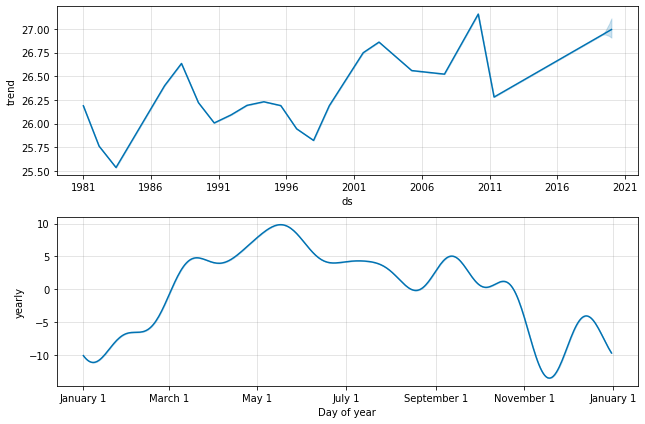

In [148]:
fig2 = model.plot_components(forecast)

In [149]:
forecast_2019 = forecast.tail(12)
forecast_2019["Month"] = forecast_2019["ds"].dt.month
print (forecast_2019[["yhat"]].shape,conditions_val[["mid_temp"]].shape)
test = pd.merge(conditions_val[["mid_temp","Month"]],forecast_2019[["yhat","Month"]])
# cols = ['ds','actual','yhat']
from sklearn.metrics import mean_squared_error
print (mean_squared_error(test["mid_temp"], test["yhat"]))
test

(12, 1) (384, 1)
17.86098225220628


C:\Users\H\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,mid_temp,Month,yhat
0,14.30,1,20.130400
1,14.85,1,20.130400
2,15.95,1,20.130400
3,13.05,1,20.130400
4,17.40,1,20.130400
...,...,...,...
379,14.85,12,17.437894
380,19.95,12,17.437894
381,14.75,12,17.437894
382,13.25,12,17.437894


In [150]:
import matplotlib.pyplot as plt

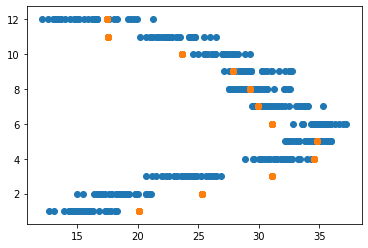

In [151]:
plt.scatter([test['mid_temp']],test['Month'])
plt.scatter([test['yhat']],test['Month'])
plt.show()